# fish market

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [69]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [70]:
bream_df = df[df['Species'] == 'Bream']
bream_length = bream_df['Length2'].tolist()
bream_weight = bream_df['Weight'].tolist()

In [71]:
smelt_df = df[df['Species'] == 'Smelt']
smelt_length = smelt_df['Length2'].tolist()
smelt_weight = smelt_df['Weight'].tolist()

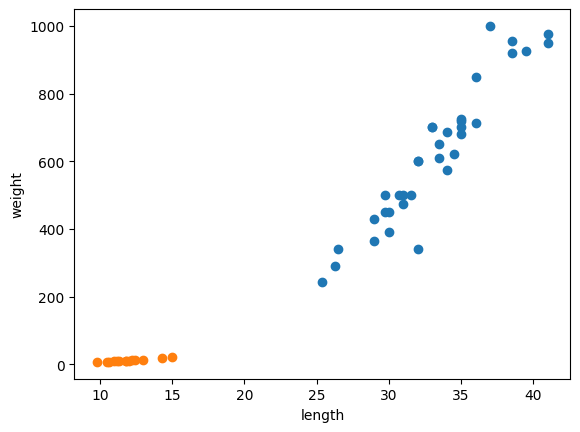

In [72]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [169]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [170]:
# zip 으로 2차원, for문으로 리스트생성
fish_data = [[l, w] for l, w in zip(length, weight)]
fish_data = [list(item) for item in zip(length, weight)] # 동일

In [171]:
# 타겟
target_data = [1] * len(bream_length) + [0] * len(smelt_length)

In [172]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [173]:
# 학습데이터 + 정답지 => 지도학습
kn.fit(fish_data, target_data)

KNeighborsClassifier()

In [174]:
kn.score(fish_data, target_data)

1.0

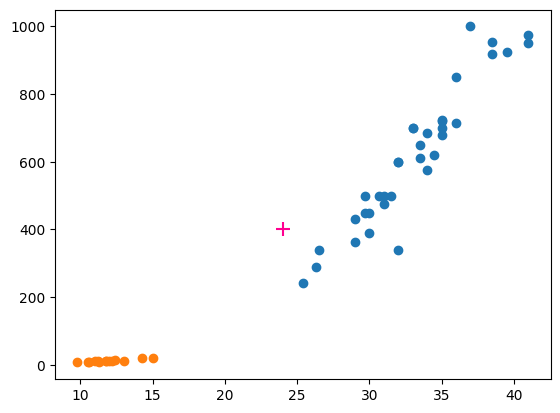

In [175]:
plt.scatter(bream_length, bream_weight)
plt.scatter(24,400, c='#ff0090',s=100,marker='+')
plt.scatter(smelt_length, smelt_weight)

In [176]:
#데이터 형태 일치
kn.predict([[10, 200]])

array([1])

In [178]:
kn._fit_X
kn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [179]:
# n_neighbors
kn49 = KNeighborsClassifier(n_neighbors=49)

In [183]:
kn49.fit(fish_data, target_data)
kn49.score(fish_data, target_data)

0.7142857142857143

In [184]:
35/49

0.7142857142857143

In [ ]:
## 하이퍼 파라미터 - 사람이 손봐야 하는 부분

In [1]:
kn = KNeighborsClassifier()
kn.fit(fish_data, target_data)

for n in range(5, 50):
    kn.n_neighbors = n

    score = kn.score(fish_data, target_data)
    # print(n, score)
    # if score < 1:
    #     break

NameError: name 'KNeighborsClassifier' is not defined

## iris
1. 데이터 가져오기
2. 어떤 데이터 가져올까
3. kn 학습
4. matpoltlib 시각화

In [8]:
import seaborn as sns
df = sns.load_dataset('iris')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [23]:
setosa = df[df['species'] == 'setosa']
versicolor = df[df['species'] == 'versicolor']
virginica = df[df['species'] == 'virginica']

In [24]:
setosa.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


In [25]:
versicolor.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000


In [26]:
virginica.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


In [42]:
import matplotlib.pyplot as plt

setosa_sl = setosa['sepal_length'].tolist()
setosa_sw = setosa['sepal_width'].tolist()
setosa_pl = setosa['petal_length'].tolist()
setosa_pw = setosa['petal_width'].tolist()

versicolor_sl = versicolor['sepal_length'].tolist()
versicolor_sw = versicolor['sepal_width'].tolist()
versicolor_pl = versicolor['petal_length'].tolist()
versicolor_pw = versicolor['petal_width'].tolist()

virginica_sl = virginica['sepal_length'].tolist()
virginica_sw = virginica['sepal_width'].tolist()
virginica_pl = virginica['petal_length'].tolist()
virginica_pw = virginica['petal_width'].tolist()


In [51]:
setosa.mean(numeric_only=True)

sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
dtype: float64

In [52]:
versicolor.mean(numeric_only=True)

sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64

In [53]:
virginica.mean(numeric_only=True)

sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64

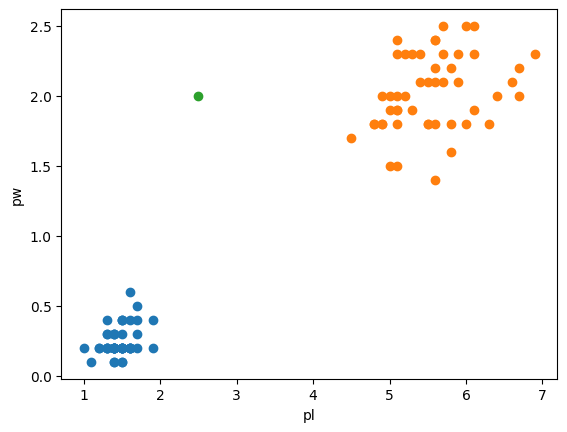

In [81]:
import matplotlib.pyplot as plt

plt.scatter(setosa_pl, setosa_pw)
plt.scatter(virginica_pl, virginica_pw)
plt.scatter(2.5,2)
plt.xlabel('pl')
plt.ylabel('pw')
plt.show()

In [62]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [63]:
pl = setosa_pl + virginica_pl
pw = setosa_pw + virginica_pw

In [64]:
iris_data = [list(item) for item in zip(pl, pw)]

In [65]:
iris_spc = [1] * len(setosa_pl) + [0] * len(virginica_pl)

In [66]:
kn.fit(iris_data, iris_spc)

KNeighborsClassifier()

In [68]:
kn.score(iris_data, iris_spc)

1.0

In [76]:
kn.n_neighbors=10

In [77]:
kn.score(iris_data, iris_spc)

1.0

In [ ]:
kn.predict([[10, 200]])